此时很懒，摘抄一段博客园博主Charlotte77对自编码器的描述：简单说说AE模型，主要步骤很简单，有三层，输入-隐含-输出，把数据input进去，encode然后再decode，损失函数差值越小，目标函数值越优。简单地说，就是你输入n维的数据，输出的还是n维的数据，有人可能会问，这有什么用呢，其实也没什么用，主要是能够把数据缩放，如果你输入的维数比较大，譬如实际的特征是几千维的，全部拿到算法里跑，效果不见得好，因为并不是所有特征都是有用的，用AE模型后，你可以压缩成m维（就是隐含层的节点数），如果输出的数据和原始数据的大小变换比例差不多，就证明这个隐含层的数据是可用的。这样看来好像和降维的思想类似，当然AE模型的用法远不止于此。

# 使用MNIST数据集实现只含一个隐藏层的自编码器(keras)

In [26]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

class AENetwork:
    
    '''包含一个隐藏层的神经网络'''
    
    def __init__(self,input_num,hidden_num,output_num,activation_name = 'relu',optimizer=Adam(),
                loss_name = 'binary_crossentropy',metrics=['accuracy']):
        self.model =Sequential()
        
        self.hidden_layer = Dense(hidden_num,activation=activation_name)
        self.output_layer = Dense(output_num,activation=activation_name)
        
        self.model.add(self.hidden_layer)
        self.model.add(self.output_layer)
        
        self.optimizer = optimizer
        self.loss = loss_name
        self.metrics = metrics
        
    def train(self,x,n_batch_size=256,n_epoches=50,f_validation_split=0.2,n_verbose = 1):
        self.model.compile(optimizer = self.optimizer,loss = self.loss,metrics = self.metrics)
        self.model.fit(x,x,batch_size = n_batch_size,epochs=n_epoches,validation_split=f_validation_split,verbose=n_verbose)
       
    def predict(self,x):
        return self.model.predict(x)

In [27]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train_reshape = x_train.reshape(-1,28*28).astype('float32')
x_test_reshape = x_test.reshape(-1,28*28).astype('float32')

#对数据进行归一化处理
x_train_reshape /= 255
x_test_reshape /=255 

In [28]:
ae = AENetwork(784,32,784)
ae.train(x_train_reshape)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 105us/sample - loss: 0.3600 - acc: 0.7980 - val_loss: 0.2632 - val_acc: 0.8006
Epoch 2/50
48000/48000 [==============================] - 4s 77us/sample - loss: 0.2453 - acc: 0.8008 - val_loss: 0.2286 - val_acc: 0.8033
Epoch 3/50
48000/48000 [==============================] - 4s 74us/sample - loss: 0.2235 - acc: 0.8037 - val_loss: 0.2246 - val_acc: 0.8052
Epoch 4/50
48000/48000 [==============================] - 4s 74us/sample - loss: 0.2178 - acc: 0.8048 - val_loss: 0.2278 - val_acc: 0.8062
Epoch 5/50
48000/48000 [==============================] - 4s 76us/sample - loss: 0.2077 - acc: 0.8064 - val_loss: 0.1999 - val_acc: 0.8075
Epoch 6/50
48000/48000 [==============================] - 4s 75us/sample - loss: 0.1968 - acc: 0.8073 - val_loss: 0.1930 - val_acc: 0.8088
Epoch 7/50
48000/48000 [==============================] - 4s 77us/sample - loss: 0.1903 - acc: 0.8082 - val_loss: 0

In [29]:
decoder_imgs = ae.predict(x_test_reshape)

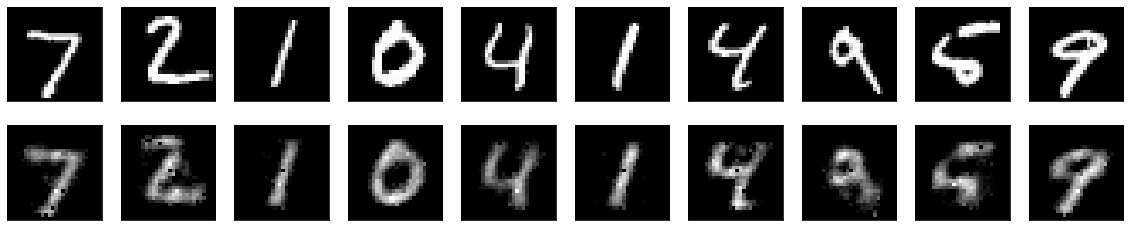

In [30]:
# 显示10个数字
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))

n = 10
for i in range(10):
    #可视化输入数据
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test_reshape[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # 可视化经过自编码学习后的结果
    ax = plt.subplot(2,n,i+n+1)
    plt.imshow(decoder_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

由此可以看出，这个自编码器的学习能力还是可以的。这里只用了一个隐含层，如果使用更多的隐含层，其效果应该更好